### Data Mining course
**Student:**    Danis Alukaev <br>
**Email:**      d.alukaev@innopolis.university <br>
**Group:**      B19-DS-01

## Table of contents

- Prerequisites
  - Select modeling technique
    - Recommender System
    - Logistic Optimization
    - Predicting Cancellations
    - Predicting the Total Revenue.
  - Generate test design
  - Build model
  - Assess model
- Modeling

## Prerequisites

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from mlxtend.frequent_patterns import apriori, association_rules
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import warnings
import os

%matplotlib inline
random.seed(42)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [3]:
ds_dir = './data/'
ds = 'completed_orders.csv'
path = os.path.join(ds_dir, ds)

data = pd.read_csv(path)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,Weekday,Hour,Segment,Population,Wage,Holiday
0,536365,8512,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,Wednesday,8,Can't lose them,62.026,44521,False
1,536365,7105,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,Can't lose them,62.026,44521,False
2,536365,8440,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,Wednesday,8,Can't lose them,62.026,44521,False
3,536365,8402,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,Can't lose them,62.026,44521,False
4,536365,8402,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,Can't lose them,62.026,44521,False


# Modeling
---------------------
In this phase, various modeling techniques are selected and applied and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often necessary.

## Select modeling techuique
----------


### Task

As the first step in modeling, select the actual modeling technique that is to be used. Whereas you possibly already selected a tool in business understanding, this task refers to the specific modeling technique, e.g.,decision tree building with C4.5 or neural network generation with back propagation. If multiple techniques are applied, perform this task for each technique separately.

### Output

#### Modeling technique

Document the actual modeling technique that is to be used.

#### Modeling assumptions

Many modeling techniques make specific assumptions on the data, e.g.,all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any such assumptions made.

----------------

As a data mining goals I have multiple topics: recommender system, cost optimization, prediction of cancellations and total revenue. These are the notes regarding each of them. 

### 1. Recommender system
As a baseline I will take Association Rules learning Apriori algorithm. It determines the items that are likely to be bought together. It does not take into account any of the features except the buckets with items. The main limitation is costly wasting of time to hold a vast number of candidate sets with much frequent itemsets, low minimum support or large itemsets. One of the major assumptions about the data is that there are no misspellings in the item names.

The first option will be to use a Neural Network to predict the content of cart based on the ID of customer, date/time, country, segement and wage. The data here should be balanced (no bias). It is also important that the categorical features should encoded and for all of the applied scaler.

[?] The second option will be to use an External Recommender system based on DBSCAN. For clusterization we use only cusomer ID and the chosen items. As a result we will have each customer associated with a cluster, so that the entire group has set of items in common. This items will be our suggestion. The idea might be developed via computation the distance between the new user and other one. The purchase of the closes user will be used for suggestion.

### 2. Logistic optimization

This can be solved using the the multi-output regression, and the baseline will Multi-Layer Perceptron (MLP). On the input there will be date, country, population, wage, and number of holidays. The output is the expected number of items to be purchased. 

### 3. Predicting cancellations

This is the binary classification problem that can be solved by using Neural Network. To determine whether the order will be cancelled there can be used features related to the products purchased, country date, segment, and whether it is holiday.

### 4. Predicting the total revenue

This task relates to sequence-to-sequence models, so Pr.Beklaryan said that we try something in this field in next labs.

## Generate test design
------------------




### Task

Before we actually build a model, we need to generate a procedure or mechanism to test the model's quality and validity. For example, in supervised data mining tasks such as classification, it is common to use error rates as quality measures for data mining models. Therefore, we typically separate the dataset into train and test set, build the model on the train set and estimate its quality on the separate test set.

### Output

Describe the intended plan for training, testing and evaluating the models. A primary component of the plan is to decide how to divide the available dataset into training data, test data and validation datasets.

-----------------------

### 1. Recommender System

The recommender system is a tricky field that cannot be properly tested without external validation. Frankly speaking, the best way is to design the A/B testing, and check how the new approach influenced the satisfaction from the suggestion, average cart, number of clicks on the suggested items, etc.

Still, there can be used traditional MAE, MSE and other metrics, but unfortunately we cannot relate it with our data. The thing is that we can only compare our suggestions with the items purson bought, and these are the items that customer will buy anyway. The solution will be to create infrastructure for testing on step 6.

### 2. Logistic Optimization
As a metric for regression I would use Root-Mean-Squared Error (RMSE). The data is to be splitted into 70% for train, 20% for test, and 10% for validation. The optimizer will be the AdamW with a One Cycle LR scheduler.

### 3. Predicting Cancellations
Since it is the binary classification problem the metric might be F1-score (rel. precision, recall). The data is to be splitted into 70% for train, 20% for test, and 10% for validation. The optimizer will be the AdamW with a One Cycle LR scheduler.

### 4. Predicting the total revenue
TBD later in the course. But from my experience - Pearcon coefficient and split of data - 80% for train, 10% for test, and 10% for validation.

## Build model
----------



### Task

Run the modeling tool on the prepared dataset to create one or more models.

### Output

#### Parameter settings 

With any modeling tool, there are often a large number of parameters that can be adjusted. List the parameters and their chosen value, along with the rationale for the choice of parameter settings. 

#### Models 

These are the actual models produced by the modeling tool, not a report.

#### Model description

Describe the resultant model. Report on the interpretation of the models and document any difficulties encountered with their meanings.

--------------

### 1. Recommender system

In [5]:
df = data.copy()

#### Association Rules (baseline) & Lab 4

Let's find top three countries by invoice count.

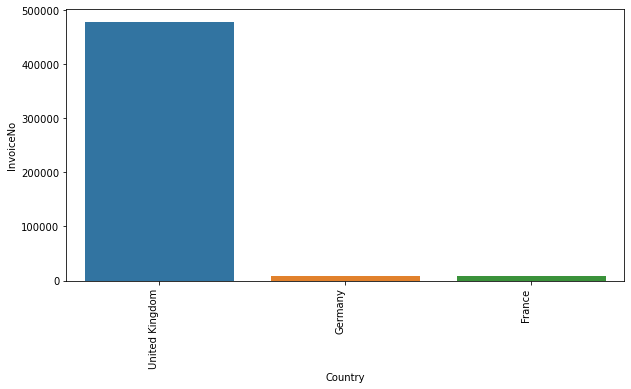

In [6]:
number_invoices = df[['InvoiceNo', 'Country']]
number_invoices.drop_duplicates(inplace=True)

invoices = pd.DataFrame(df.groupby('Country')['InvoiceNo'].count()).sort_values(by='InvoiceNo', ascending=False).reset_index()

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
ax1 = sns.barplot(x='Country', y='InvoiceNo', data=invoices.head(3), estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.show()

They appeared to be "United Kingdom", "Germany" and "France".

In [7]:
def run_apriori(country, min_support=0.01):
    df_country = df[df.Country == country]
    df_items = df_country.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    item_set = apriori(df_items, min_support=min_support, use_colnames=True)
    item_set.sort_values(by='support', ascending=False, inplace=True)
    item_set['len'] = item_set['itemsets'].apply(lambda x: len(x))
    return item_set

#### United Kingdom

In [8]:
item_set_uk = run_apriori("United Kingdom")

In [9]:
item_set_uk[item_set_uk.len > 1].head(20)

,support,itemsets,len
1217,0.043852,"(jumbo bag red retrospot, jumbo bag pink polka...",2
1016,0.039104,"(roses regency teacup and saucer , green regen...",2
1268,0.038992,"(jumbo storage bag suki, jumbo bag red retrospot)",2
1266,0.036702,"(jumbo bag red retrospot, jumbo shopper vintag...",2
1427,0.033909,"(lunch bag red retrospot, lunch bag black sku...",2
1009,0.032177,"(pink regency teacup and saucer, green regency...",2
1129,0.031842,"(jumbo bag baroque black white, jumbo bag red...",2
852,0.031451,"(alarm clock bakelike red , alarm clock bakeli...",2
1485,0.030948,"(lunch bag pink polkadot, lunch bag red retros...",2
1620,0.030445,"(pink regency teacup and saucer, roses regency...",2


In [10]:
rules = association_rules(item_set_uk, metric="confidence", min_threshold=0.8)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pink regency teacup and saucer),(green regency teacup and saucer),0.039216,0.052064,0.032177,0.820513,15.759657,0.030135,5.281357
1,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.030445,0.052064,0.027484,0.902752,17.339237,0.025899,9.747642
2,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer ),0.032177,0.053405,0.027484,0.854167,15.994181,0.025766,6.490938
3,"(jumbo storage bag suki, jumbo bag pink polkadot)",(jumbo bag red retrospot),0.028211,0.108095,0.022624,0.801980,7.419249,0.019575,4.504123
4,"(jumbo bag pink polkadot, jumbo shopper vintag...",(jumbo bag red retrospot),0.025362,0.108095,0.020446,0.806167,7.457986,0.017704,4.601421
5,"(charlotte bag suki design, strawberry charlot...",(red retrospot charlotte bag),0.021954,0.050444,0.017988,0.819338,16.242500,0.016880,5.255992
6,"(charlotte bag pink polkadot, strawberry charl...",(red retrospot charlotte bag),0.020222,0.050444,0.017597,0.870166,17.250096,0.016577,7.313601
7,"(charlotte bag suki design, charlotte bag pink...",(red retrospot charlotte bag),0.021451,0.050444,0.017485,0.815104,16.158560,0.016403,5.135626
8,"(strawberry charlotte bag, woodland charlotte ...",(red retrospot charlotte bag),0.020893,0.050444,0.017038,0.815508,16.166566,0.015984,5.146868
9,"(regency cakestand 3 tier, pink regency teacup...",(green regency teacup and saucer),0.019440,0.052064,0.016871,0.867816,16.668214,0.015858,7.171341


#### Germany

In [11]:
item_set_ger = run_apriori("Germany")

In [12]:
item_set_ger[item_set_ger.len > 1].head(20)

,support,itemsets,len
2072,0.135440,"(round snack boxes set of4 woodland , round sn...",2
1798,0.076749,"(round snack boxes set of4 woodland , plasters...",2
2141,0.072235,"(round snack boxes set of4 woodland , spaceboy...",2
1709,0.069977,"(plasters in tin woodland animals, plasters in...",2
2158,0.065463,"(round snack boxes set of4 woodland , woodland...",2
1744,0.063205,"(plasters in tin spaceboy, plasters in tin woo...",2
1902,0.060948,"(red retrospot charlotte bag, woodland charlot...",2
1721,0.058691,"(round snack boxes set of4 woodland , plasters...",2
1720,0.051919,"(plasters in tin circus parade , round snack b...",2
1325,0.049661,"(jumbo bag red retrospot, jumbo bag woodland a...",2


In [13]:
rules = association_rules(item_set_ger, metric="confidence", min_threshold=0.8)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(round snack boxes set of 4 fruits ),(round snack boxes set of4 woodland ),0.162528,0.252822,0.135440,0.833333,3.296131,0.094350,4.483070
1,(red retrospot charlotte bag),(woodland charlotte bag),0.072235,0.130926,0.060948,0.843750,6.444504,0.051491,5.562077
2,(set/6 red spotty paper cups),(set/6 red spotty paper plates),0.054176,0.058691,0.047404,0.875000,14.908654,0.044224,7.530474
3,(set/6 red spotty paper plates),(set/6 red spotty paper cups),0.058691,0.054176,0.047404,0.807692,14.908654,0.044224,4.918284
4,"(plasters in tin circus parade , round snack b...",(round snack boxes set of4 woodland ),0.051919,0.252822,0.042889,0.826087,3.267469,0.029763,4.296275
5,"(plasters in tin woodland animals, round snack...",(round snack boxes set of4 woodland ),0.049661,0.252822,0.042889,0.863636,3.415990,0.030334,5.479308
6,(childrens cutlery spaceboy ),(childrens cutlery dolly girl ),0.049661,0.051919,0.040632,0.818182,15.758893,0.038054,5.214447
7,"(round snack boxes set of 4 fruits , woodland ...",(round snack boxes set of4 woodland ),0.047404,0.252822,0.040632,0.857143,3.390306,0.028647,5.230248
8,"(spaceboy lunch box , round snack boxes set of...",(round snack boxes set of4 woodland ),0.040632,0.252822,0.038375,0.944444,3.735615,0.028102,13.449210
9,(charlotte bag suki design),(woodland charlotte bag),0.047404,0.130926,0.038375,0.809524,6.183087,0.032168,4.562641


#### France

In [14]:
item_set_fra = run_apriori("France")

In [15]:
item_set_fra[item_set_fra.len > 1].head(20)

,support,itemsets,len
4598,0.125654,"(set/6 red spotty paper cups, set/6 red spotty...",2
3783,0.107330,"(plasters in tin spaceboy, plasters in tin woo...",2
4578,0.104712,"(set/6 red spotty paper cups, set/20 red retro...",2
3694,0.104712,"(plasters in tin woodland animals, plasters in...",2
4579,0.104712,"(set/20 red retrospot paper napkins , set/6 re...",2
11609,0.102094,"(set/6 red spotty paper cups, set/20 red retro...",3
3691,0.091623,"(plasters in tin spaceboy, plasters in tin cir...",2
750,0.081152,"(alarm clock bakelike red , alarm clock bakeli...",2
899,0.075916,"(alarm clock bakelike pink, alarm clock bakeli...",2
749,0.075916,"(alarm clock bakelike pink, alarm clock bakeli...",2


In [16]:
rules = association_rules(item_set_fra, metric="confidence", min_threshold=0.8)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(set/6 red spotty paper cups),(set/6 red spotty paper plates),0.141361,0.130890,0.125654,0.888889,6.791111,0.107152,7.821990
1,(set/6 red spotty paper plates),(set/6 red spotty paper cups),0.130890,0.141361,0.125654,0.960000,6.791111,0.107152,21.465969
2,(set/6 red spotty paper plates),(set/20 red retrospot paper napkins ),0.130890,0.136126,0.104712,0.800000,5.876923,0.086895,4.319372
3,"(set/6 red spotty paper cups, set/20 red retro...",(set/6 red spotty paper plates),0.104712,0.130890,0.102094,0.975000,7.449000,0.088388,34.764398
4,"(set/6 red spotty paper cups, set/6 red spotty...",(set/20 red retrospot paper napkins ),0.125654,0.136126,0.102094,0.812500,5.968750,0.084989,4.607330
5,"(set/20 red retrospot paper napkins , set/6 re...",(set/6 red spotty paper cups),0.104712,0.141361,0.102094,0.975000,6.897222,0.087292,34.345550
6,(alarm clock bakelike red ),(alarm clock bakelike green),0.096859,0.099476,0.081152,0.837838,8.422475,0.071517,5.553229
7,(alarm clock bakelike green),(alarm clock bakelike red ),0.099476,0.096859,0.081152,0.815789,8.422475,0.071517,4.902767
8,(childrens cutlery spaceboy ),(childrens cutlery dolly girl ),0.070681,0.073298,0.065445,0.925926,12.632275,0.060264,12.510471
9,(childrens cutlery dolly girl ),(childrens cutlery spaceboy ),0.073298,0.070681,0.065445,0.892857,12.632275,0.060264,8.673647


The algorith charachtarizes by three main components:
1. Support - the probability of an event to occur.
2. Confidence - a measure of conditional probability
3. Lift - the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

I found it essential to have a constraint on support to be at least 1% probable (for an environment given by the data).

As you might see the great thing about this approach is also that it can retrieve single popular items.

### Neural Network (Option 1)

In [12]:
df_nn = df[['CustomerID', 'Year', 'Month', 'Day', 'Weekday', 'Segment', 'Hour', 'Wage', 'Holiday', 'StockCode']]
df_nn.head()

,CustomerID,Year,Month,Day,Weekday,Segment,Hour,Wage,Holiday,StockCode
0,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,8512
1,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,7105
2,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,8440
3,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,8402
4,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,8402


In [13]:
from sklearn.preprocessing import OneHotEncoder

categories = [f"P{i}" for i in range(len(df.StockCode.unique()))]

#  categories=categories
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df[['StockCode']])

features_encoded = pd.DataFrame(encoder.transform(df[['StockCode']]))
df_nn.drop(['StockCode'], axis=1)
df_nn = pd.concat([df_nn, features_encoded], axis=1)
df_nn.head()

,CustomerID,Year,Month,Day,Weekday,Segment,Hour,Wage,Holiday,StockCode,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,...,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615
0,17850,2010,12,1,Wednesday,Can't lose them,8,44521,False,8512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17850,2010,12,1,Wednesday,Can't lose them,8,44

In [14]:
strategy = {i: 'sum' for i in range(616)}

df_nn_encoded = df_nn.groupby(['CustomerID', 'Year', 'Month', 'Day'], as_index=False).agg(strategy)

In [15]:
for i in range(616):
    idx = float(i)
    df_nn_encoded.loc[df_nn_encoded[idx] != 0, idx] = 1

In [16]:
df_nn.dtypes

CustomerID      int64
Year            int64
Month           int64
Day             int64
Weekday        object
               ...   
611           float64
612           float64
613           float64
614           float64
615           float64
Length: 626, dtype: object

In [17]:
df_nn = pd.merge(df_nn_encoded, df_nn[['CustomerID', 'Year', 'Month', 'Day', 'Weekday', 'Hour', 'Wage', 'Holiday', 'Segment']].drop_duplicates(), on=['CustomerID', 'Year', 'Month', 'Day'], how='inner')

In [18]:
df_nn.replace({False: 0, True: 1}, inplace=True)

It appears that there are no purchases in holidays. Let's drop this column then.

In [19]:
df_nn = df_nn.drop(['Holiday'], axis=1)

In [20]:
df_nn.head()

,CustomerID,Year,Month,Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,...,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,Weekday,Hour,Wage,Segment
0,12346,2011,1,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,10,44521,Hibernating
1,12347,2010,12,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Use one-hot encoding for weekday.

In [21]:
from sklearn.preprocessing import OneHotEncoder

categories = df_nn['Weekday'].unique()


#  categories=categories
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df_nn[['Weekday']])

features_encoded = pd.DataFrame(encoder.transform(df_nn[['Weekday']]))
features_encoded.rename(columns={float(i): encoder.categories_[0][i] for i in range(len(encoder.categories_[0]))}, inplace=True)

df_nn = df_nn.drop(['Weekday'], axis=1)
df_nn = pd.concat([df_nn, features_encoded], axis=1)
df_nn.head()

,CustomerID,Year,Month,Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,...,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,Hour,Wage,Segment,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
0,12346,2011,1,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,44521,Hibernating,0.0,0.0,0.0,0.0,1.0,0.0
1,12347,2010,12,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Use one-hot encoding for segment.

In [22]:
from sklearn.preprocessing import OneHotEncoder

categories = df_nn['Segment'].unique()


#  categories=categories
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df_nn[['Segment']])

features_encoded = pd.DataFrame(encoder.transform(df_nn[['Segment']]))
features_encoded.rename(columns={float(i): encoder.categories_[0][i] for i in range(len(encoder.categories_[0]))}, inplace=True)

df_nn = df_nn.drop(['Segment'], axis=1)
df_nn = pd.concat([df_nn, features_encoded], axis=1)
df_nn.head()

,CustomerID,Year,Month,Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,...,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,Hour,Wage,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,About to sleep,At Risk,Can't lose them,Champions,Customers Needing Attention,Hibernating,Loyal Customers,Potential Loyalists,Promising,Recent Customers
0,12346,2011,1,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,44521,0.0,0.0,0.0,0.

Apply scaling to numeric attributes.

In [23]:
for column in ['Year', 'Month', 'Day', 'Hour', 'Wage']:
    scaler = MinMaxScaler()
    scaler.fit(df_nn.loc[:, column].to_numpy()[..., np.newaxis])
    scaled = scaler.transform(df_nn.loc[:, column].to_numpy()[..., np.newaxis])
    df_nn[column] = scaled

In [24]:
df_nn.head()

,CustomerID,Year,Month,Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,...,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,Hour,Wage,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,About to sleep,At Risk,Can't lose them,Champions,Customers Needing Attention,Hibernating,Loyal Customers,Potential Loyalists,Promising,Recent Customers
0,12346,1.0,0.000000,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.

Splitting data.

In [25]:
attributes = ['Month', 'Day', 'Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Hour', 'Champions', 'Customers Needing Attention', 'Hibernating', 'Loyal Customers', 'Potential Loyalists', 'Promising', 'Recent Customers']

In [26]:
X, Y = df_nn[attributes], df_nn[[i for i in range(1, 616)]]

In [27]:
X.shape, Y.shape

((18392, 16), (18392, 615))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.30, random_state=42)

In [29]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x.to_numpy(dtype=np.float32)
        self.y = y.to_numpy(dtype=np.float32)
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [30]:
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

In [31]:
train_dataloader = DataLoader(train_dataset, batch_size=1000)
test_dataloader = DataLoader(test_dataset, batch_size=1000)

Building simple network.

In [32]:
import torch

class Net(torch.nn.Module):
   def __init__(self, input_dim=19, output_dim=615):
       super(Net, self).__init__()
       self.layer1 = torch.nn.Linear(input_dim, 64)
       self.layer2 = torch.nn.Linear(64, 128)
       self.layer3 = torch.nn.Linear(128, 256)
       self.layer4 = torch.nn.Linear(256, 512)
       self.layer5 = torch.nn.Linear(512, 1024)
       self.layer6 = torch.nn.Linear(1024, 2048)
       self.layer7 = torch.nn.Linear(2048, output_dim)
       self.sigmoid = torch.nn.Sigmoid()
       self.relu = torch.nn.ReLU()

   def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.relu(self.layer5(x))
        x = self.relu(self.layer6(x))
        x = self.sigmoid(self.layer7(x))
        return x

In [33]:
device = "cuda:0"

In [34]:
model = Net(len(attributes),615).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
loss_function = torch.nn.MSELoss()

In [35]:
EPOCHS = 100

for i in range(EPOCHS):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        x, y_true = batch

        x = x.to(device)
        y_true = y_true.to(device)
        
        y_pred = model(x)
        
        loss = loss_function(y_pred, y_true)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            x, y_true = batch[0].to(device), batch[1].to(device)
            y_pred = model(x)
            loss = loss_function(y_true, y_pred)
            test_loss += loss.item()
    print(f"EPOCH {i + 1}. Train loss: {train_loss/len(X_train)}. Test loss: {test_loss/len(X_test)}.")


EPOCH 1. Train loss: 0.0002476687046687796. Test loss: 0.0002455481017950839.
EPOCH 2. Train loss: 0.0002204875016279133. Test loss: 0.00018955982453708263.
EPOCH 3. Train loss: 0.0001244743015916336. Test loss: 5.368342220875835e-05.
EPOCH 4. Train loss: 3.592140106832979e-05. Test loss: 3.202580559877211e-05.
EPOCH 5. Train loss: 3.196352753364023e-05. Test loss: 3.241468172719107e-05.
EPOCH 6. Train loss: 3.199336269900205e-05. Test loss: 3.2130353912857766e-05.
EPOCH 7. Train loss: 3.163139507260144e-05. Test loss: 3.1729274130836785e-05.
EPOCH 8. Train loss: 3.117245227140134e-05. Test loss: 3.122436996802093e-05.
EPOCH 9. Train loss: 3.0646638859961e-05. Test loss: 3.077474035465427e-05.
EPOCH 10. Train loss: 3.0327273634894213e-05. Test loss: 3.06279179054119e-05.
EPOCH 11. Train loss: 3.0245695159554536e-05. Test loss: 3.0594456850216835e-05.
EPOCH 12. Train loss: 3.0223176743287152e-05. Test loss: 3.0580427206315755e-05.
EPOCH 13. Train loss: 3.0212755392700392e-05. Test loss:

## Assess model
-------------



### Task

The data mining engineer interprets the models according to his domain knowledge, the data mining success criteria and the desired test design. This task interferes with the subsequent evaluation phase. Whereas the data mining engineer judges the success of the application of modeling and discovery techniques more technically, he contacts business analysts and domain experts later in order to discuss the data mining results in the business context. Moreover, this task only considers models whereas the evaluation phase also takes into account all other results that were produced in the course of the project. The data mining engineer tries to rank the models. He assesses the models according to the evaluation criteria. As far as possible he also takes into account business objectives and business success criteria. In most data mining projects, the data mining engineer applies a single technique more than once or generates data mining results with different alternative techniques. In this task, he also compares all results according to the evaluation criteria.

### Output

#### Model assessment

Summarize results of this task, list qualities of generated models (e.g.,in terms of accuracy) and rank their quality in relation to each other. 

#### Revised parameter settings

According to the model assessment, revise parameter settings and tune them for the next run in the Build Model task. Iterate model building and assessment until you strongly believe that you found the best model(s). Document all such revisions and assessments.

-----------------

### 1. Recommender system

As it was mentioned earlier, the testing of recommender system for a given data will not be trustworthy because of the lack of external validation. In the step 6 I'm planning to build an A/B testing infrastructure to assess the efficiency of proposed technique.

The f1 score with average over validations samples is `0.16686578330567384`. <br>
With clusterization it became `0.15558374817756168`.

In [36]:
y_predicted = model(torch.Tensor(X_validation.to_numpy()).to(device))
sigma = torch.nn.Sigmoid() 
y_predicted = sigma(y_predicted.to('cpu').detach()).numpy()

THRESHOLD = 0.52

y_predicted[y_predicted >= THRESHOLD] = 1
y_predicted[y_predicted < THRESHOLD] = 0

from sklearn.metrics import f1_score
f1_score(y_validation, y_predicted, average='samples')

0.15558374817756168

### Backlog:
1. Does customer buys goods based on the product name.